In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df["area_type"].nunique()

4

In [9]:
df.drop(["area_type","society","balcony","availability"],axis=1,inplace=True)

In [10]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df.shape

(13246, 5)

In [15]:
df["bath"].isnull().sum()

0

In [16]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df["bhk"]=df["size"].apply(lambda x: int(x.split(" ")[0]))

In [18]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [19]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df[df["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def isflot(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
mask=df["total_sqft"].apply(isflot)

In [24]:
df[~mask].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [25]:
def checkstring(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return(float(x))
    except:
        return None

In [26]:
checkstring("2150-5487")

3818.5

In [27]:
df["total_sqft"]=df["total_sqft"].apply(checkstring)

In [28]:
df.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [29]:
df.shape

(13246, 6)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [31]:
df3=df.copy()

In [32]:
df3["price_per_sqft"]=df["price"]*100000/df["total_sqft"]

In [33]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   bhk             13246 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [35]:
len(df3["location"].unique())

1304

In [36]:
df3["location"]=df3["location"].apply(lambda x: x.strip())
location_stat=df3.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stat

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [37]:
loca=location_stat[location_stat<=10]
loca

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [38]:
len(df3.location.unique())

1293

In [39]:
df3.location=df3.location.apply(lambda x: "other" if x in loca else x)

In [40]:
len(df3.location.unique())

242

In [41]:
df3.head(50)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.00,6.0,370.00,6,36274.509804


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   bhk             13246 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [43]:
df.drop("size",axis=1,inplace=True)

In [44]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [45]:
df3.drop(columns=["size"],axis=1,inplace=True)

In [46]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [47]:
df3[df3["total_sqft"]/df3.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [48]:
df3["price"]=df3["price"]*100000/df["total_sqft"]

In [49]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3699.810606,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,4615.384615,4,4615.384615
2,Uttarahalli,1440.0,2.0,4305.555556,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,6245.890861,3,6245.890861
4,Kothanur,1200.0,2.0,4250.000000,2,4250.000000


In [50]:
df4=df3[~(df3["total_sqft"]/df3.bhk<300)]

In [51]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3699.810606,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,4615.384615,4,4615.384615
2,Uttarahalli,1440.0,2.0,4305.555556,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,6245.890861,3,6245.890861
4,Kothanur,1200.0,2.0,4250.000000,2,4250.000000


In [52]:
df4.shape

(12502, 6)

In [53]:
df4["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [54]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key ,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [55]:
df7=remove_pps_outlier(df4)
df7.shape

(10241, 6)

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df9.shape

(7329, 6)

In [57]:
df9.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [58]:
df9.tail()

,location,total_sqft,bath,price,bhk,price_per_sqft
10232,other,1200.0,2.0,5833.333333,2,5833.333333
10233,other,1800.0,1.0,11111.111111,1,11111.111111
10236,other,1353.0,2.0,8130.081301,2,8130.081301
10237,other,812.0,1.0,3201.970443,1,3201.970443
10240,other,3600.0,5.0,11111.111111,4,11111.111111


In [59]:
df9[df9["bath"]>df9.bhk+2]["bath"].value_counts()

9.0    1
6.0    1
8.0    1
7.0    1
Name: bath, dtype: int64

In [60]:
df8=df9[df9.bath<df9.bhk+2]

In [61]:
df8.shape

(7251, 6)

In [62]:
df9[df9["bath"]>df9.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,3252.032520,4,3252.032520
5238,Nagasandra,7000.0,8.0,6428.571429,4,6428.571429
6711,Thanisandra,1806.0,6.0,6423.034330,3,6423.034330
8411,other,11338.0,9.0,8819.897689,6,8819.897689


In [63]:
df8

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,15017.543860,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,11901.840491,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,12533.333333,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,10833.333333,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,11983.805668,2,11983.805668
...,...,...,...,...,...,...
10232,other,1200.0,2.0,5833.333333,2,5833.333333
10233,other,1800.0,1.0,11111.111111,1,11111.111111
10236,other,1353.0,2.0,8130.081301,2,8130.081301
10237,other,812.0,1.0,3201.970443,1,3201.970443


In [64]:
df3=pd.get_dummies(df8["location"],drop_first=True)

In [65]:
df3

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df5=pd.concat([df8,df3.drop("other",axis=1)],axis=1)

In [67]:
df5.drop(["location"],axis=1,inplace=True)

In [68]:
df6=df5.copy()

In [69]:
df5["price"]=df5["price"]*df5.total_sqft/100000

In [70]:
df5.drop(["price_per_sqft"],axis=1,inplace=True)

In [71]:
df5.shape

(7251, 244)

In [72]:
df5.isnull().sum()

total_sqft            0
bath                  0
price                 0
bhk                   0
1st Phase JP Nagar    0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 244, dtype: int64

In [73]:
X=df5.drop("price",axis=1)

In [74]:
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y=df5["price"]

In [76]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lrc=LinearRegression()

In [81]:
lrc.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
lrc.score(X_test,y_test)

0.8452768972070155

In [83]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82174033, 0.77202163, 0.85087614, 0.80293305, 0.83400857])

In [84]:
#### check which model is best for our model

In [85]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lrc.predict([x])[0]
    

In [86]:
pre=lrc.predict(X_test)

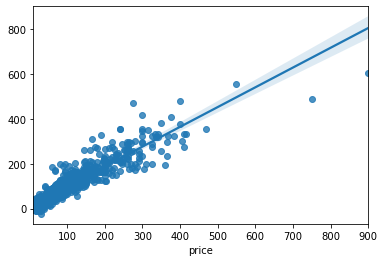

In [87]:
sns.regplot(y_test,pre)

In [88]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.46138339884851

In [89]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lrc,f)

In [90]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))